# Monte Carlo sampling using UQpy

Author: Dimitris G. Giovanis,  
Date: May 13, 2020  
UQpy Version 3.0

In [1]:
#Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, 
# but also need to import the MCS class from UQpy.
from UQpy.SampleMethods import MCS
import numpy as np
import matplotlib.pyplot as plt
import time

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS samples: [[ 1.62434536  1.78862847]
 [-0.61175641  0.43650985]
 [-0.52817175  0.09649747]
 [-1.07296862 -1.8634927 ]
 [ 0.86540763 -0.2773882 ]]


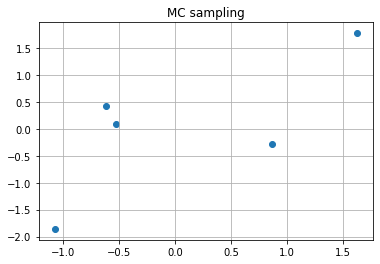

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS extended samples: [[ 1.62434536  1.78862847]
 [-0.61175641  0.43650985]
 [-0.52817175  0.09649747]
 [-1.07296862 -1.8634927 ]
 [ 0.86540763 -0.2773882 ]
 [ 1.62434536  1.78862847]
 [-0.61175641  0.43650985]]

MCS transformed samples: [[0.94784894 0.96316267]
 [0.27034947 0.66876657]
 [0.29869007 0.53843726]
 [0.1416426  0.03119649]
 [0.80659245 0.39074102]
 [0.94784894 0.96316267]
 [0.27034947 0.66876657]]


In [6]:
# Import the necessary Distributions from Distribution class to create the Distribution object
# We are going to run MCS for two  standard normal N(0,1) random variables. We set the random_state in order
# to reproduce the results.
from UQpy.Distributions import Normal
dist1 = Normal(loc=0., scale=1.)
dist2 = Normal(loc=0., scale=1.)

x = MCS(dist_object=[dist1,dist2], nsamples=5, random_state=[1,3],  verbose=True)
print()
print('MCS samples:', x.samples)
#plot the samples
fig, ax = plt.subplots()
plt.title('MC sampling')
plt.scatter(x.samples[:, 0], x.samples[:, 1], marker='o')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

fig, ax = plt.subplots()
plt.title('Histogram:parameter #1')
plt.hist(x.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2')
plt.hist(x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

# Use the MCS.run method in order to add 2 samples in the existing ones.
x.run(nsamples=2)
print()
print('MCS extended samples:', x.samples)

# Use the MCS.transform_u01 method in order transform the samples to the Uniform [0,1] space.
x.transform_u01()
print()
print('MCS transformed samples:', x.samplesU01)


UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS samples: [[ 3.38736185  2.23541269]
 [ 0.08946208  0.8979547 ]
 [ 2.53138343  3.06057229]
 [ 5.72159837  0.30657467]
 [-1.71534735  1.97285583]]


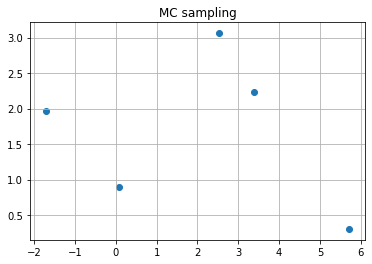

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS extended samples: [[ 3.38736185  2.23541269]
 [ 0.08946208  0.8979547 ]
 [ 2.53138343  3.06057229]
 [ 5.72159837  0.30657467]
 [-1.71534735  1.97285583]
 [ 3.38736185  2.23541269]
 [ 0.08946208  0.8979547 ]]


ValueError: UQpy: All Distributions must have a cdf method.

In [9]:
# We are going to run MCS for a multivariate normal distribution random variables.
from UQpy.Distributions import MVNormal
dist = MVNormal(mean=[1., 2.], cov=[[4., -0.9], [-0.9, 1.]])

x1 = MCS(dist_object=dist,  nsamples=5, random_state=123,  verbose=True)
print()
print('MCS samples:', x1.samples)

#plot the samples
fig, ax = plt.subplots()
plt.title('MC sampling')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1], marker='o')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

# Use the MCS.run method in order to add 2 samples in the existing ones.
x1.run(nsamples=2)
print()
print('MCS extended samples:', x1.samples)

# Use the MCS.transform_u01 method in order transform the samples to the Uniform [0,1] space.
x1.transform_u01()

In [13]:
# We are going to run MCS for a multivariate normal distribution and a standard normal distribution.
x2 = MCS(dist_object=[dist1, dist], nsamples=5, random_state=[123,None],  verbose=True)
print()
print('MCS samples:', x2.samples)

# Extract samples for the multivariate distribution 
samples = np.zeros(shape=(len(x2.samples), len(x2.samples[1])))
for i in range(len(x2.samples)):
    samples[i, :] = x2.samples[i][1]
print()
print('MVNormal samples:', samples)

# Use the MCS.run method in order to add 2 samples in the existing ones.
x2.run(nsamples=2)
print()
print('MCS extended samples:', x2.samples)

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS samples: [[array([-1.0856306]) array([2.85541717, 0.39356306])]
 [array([0.99734545]) array([4.33603802, 0.77268154])]
 [array([0.2829785]) array([0.86044412, 3.03709971])]
 [array([-1.50629471]) array([3.41804965, 1.86484387])]
 [array([-0.57860025]) array([3.03086619, 1.37426127])]]

MVNormal samples: [[2.85541717 0.39356306]
 [4.33603802 0.77268154]
 [0.86044412 3.03709971]
 [3.41804965 1.86484387]
 [3.03086619 1.37426127]]


In [17]:
# Draw samples from a continuous and discrete distribution
from UQpy.Distributions import Binomial
dist3 = Binomial(n=5, p=0.4)
x3 = MCS(dist_object=[dist1, dist3], nsamples=5, verbose=True)

print()
print('MCS samples:', x3.samples)

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS samples: [[[-0.77592899]
  [ 3.        ]]

 [[-0.70932251]
  [ 3.        ]]

 [[-0.56594082]
  [ 3.        ]]

 [[ 0.32820942]
  [ 1.        ]]

 [[ 0.51426321]
  [ 1.        ]]]
